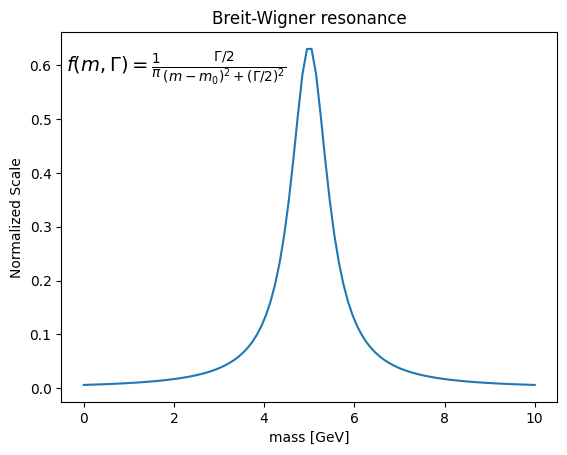

In [1]:
# Lecture 11 exercise
#
# Cauchy distribution, also known as the Lorentz distribution or the (non-relativistic) Breit–Wigner distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html
#

import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.text(0.01, 0.95,r'$f(m,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}$',transform=ax.transAxes, fontsize=14, 
        verticalalignment='top')
plt.rcParams["figure.figsize"] = (8,5)
plt.title('Breit-Wigner resonance')
plt.xlabel("mass [GeV]")
plt.ylabel("Normalized Scale")


x = np.linspace(0,10,100)
p = cauchy.pdf(x, loc=5, scale=0.5)
plt.plot(x, p)

plt.show()


In [13]:
# Generate mass of 20 particles with mass=5GeV and width = 1 GeV
# We can use built-in method  
# Set random seed to 7 to ensure reproducibility
np.random.seed(seed=7)
r = cauchy.rvs(size=20, loc=5, scale=0.5)

print(r)

[ 2.95442531  5.60408232  4.9020277   5.42288788 12.2193401   5.06076572
  5.00176003  2.8289388   4.55481385  4.99981543  5.3156156   5.70547087
  4.80374407  2.62085689  4.60747351  6.71284423  4.36936875  4.92422422
  7.2773679  -1.37892055]


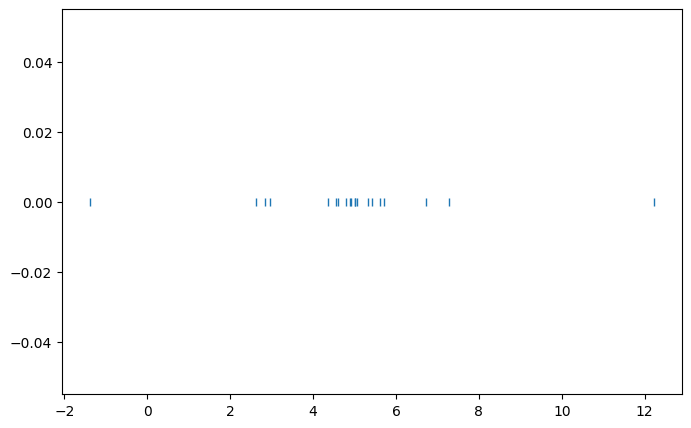

In [15]:
#
# Task0 Visualize data in mass-axis
#
#
plt.plot(r, np.zeros_like(r), "|", alpha=1);

plt.show()

In [1]:
# Task1  Draw the distribution in 1D histogram 
#        Set bin size 0.5 GeV betwen range 0 and 10 GeV
#        Draw vertical error bar in each bin
# 
# Add your code in this cell


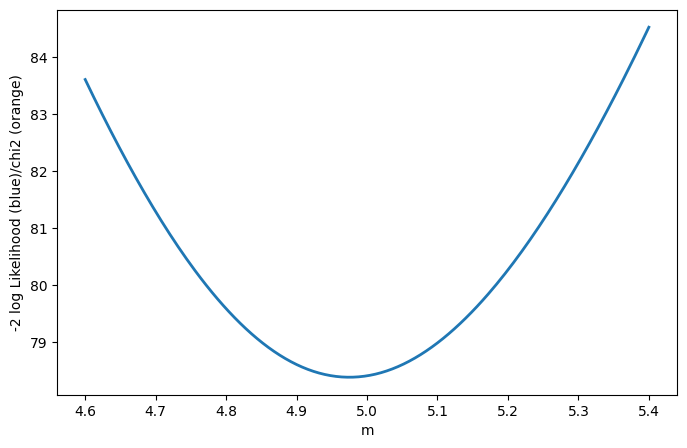

In [29]:
# Task2 Maximum likelihood method
#
# The candidate best estimate of the mass and widths are: 
#    Mass  mass0=4.97 GeV
#    Width gamma0=1.1 GeV
# 
# You are going to verify whether mass0 is the best estimate value
# Use the Breit-Wigner PDF defined below
# Code-up logLieklihood function
# Set the width to best 
#
gamma0=1.1

#
# Define Breit-Wginer PDF
#
import math
def pdf(x, m, gamma):
    return (gamma/2)/((x-m)**2+(gamma/2)**2)/math.pi

#
# Code up logLiekelihood function logLL 
# Loop over all particles, compute individual negative logPDF, and sum up all of them 
#
def logLL(m, gamma):
    val=0
    for i in r:
        # val+=
    return val


# 
# It is also convenient to compute -2*logL 
# The standard deviation is the sigma which change -2*logL by 1.
# 
logL=[]
m_range=np.linspace(4.6,5.4,201)
for m1 in m_range:
    logL.append(2*(logLL(m1,gamma0)-minNLL))

    # plot
fig, ax = plt.subplots()

ax.plot(m_range, logLoriginal, linewidth=2.0)
ax.set_xlabel('m')
ax.set_ylabel('-2 log Likelihood (blue)/chi2 (orange)')

plt.show()

# 
# If you code up logLL correctily, you will get results below.
# 


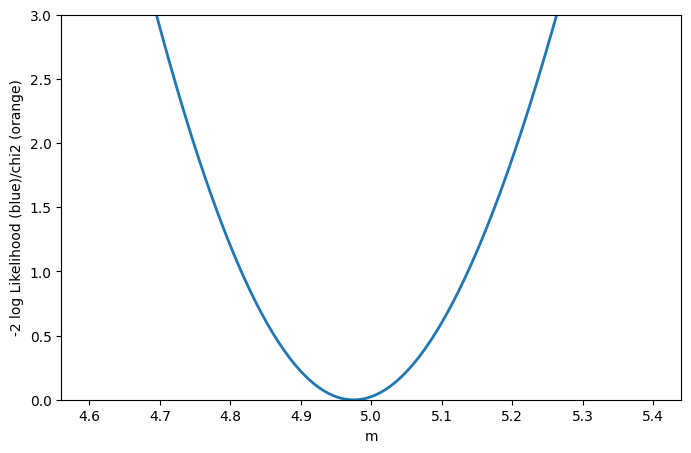

In [30]:
#
# plot 1D 
#
# minimum negative logLikelihood
# Quite often, we will find the minimum negative log-liklihood and shift -2logL to zero. 
# This makes it easier for comparison between different methods. 
#
minNLL=logLL(mass0, gamma0)

logL=[]
m_range=np.linspace(4.6,5.4,201)
for m1 in m_range:
    logL.append(2*(logLL(m1,gamma0)-minNLL))

mass0=4.97

fig, ax = plt.subplots()

ax.plot(m_range, logL, linewidth=2.0)
ax.set_xlabel('m')
ax.set_ylabel('-2 log Likelihood (blue)/chi2 (orange)')

ax.set_ylim([0,3])
plt.show()

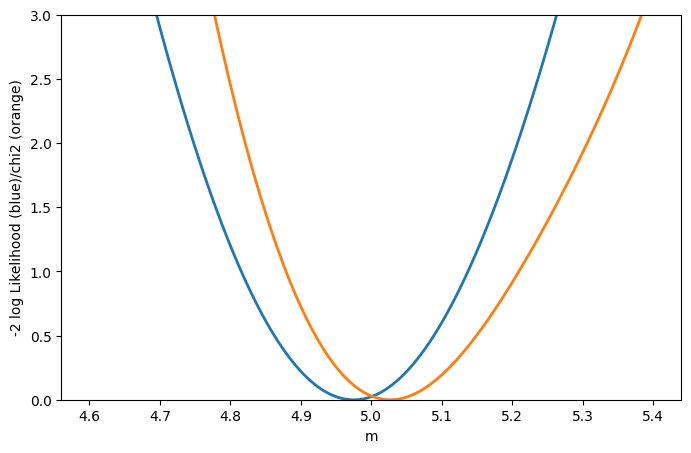

In [19]:
# Task3 Chi2 method
#
# In this exercise, you will implement the chi2 method.
#
# plot chi2 and subtract the chi2 minimun 
#


#
# The chi2 is constructed using the binned histograms.
# In each bin, you can obtain the function prediction yield fval, and the observed data n[i]
# you also need the uncertainty in each bin (which is just the Poisson uncertainty)
#
def chi2(m1):
    val=0
    binwidth=x_range[1]-x_range[0]
    for i in range(len(n)):
        x_center=x_range[i]+binwidth/2
        # predicted yields should be noramlized to the total observed data and binwidth.
        fval=len(r)*binwidth*pdf(x_center,m1,gamma0)
        # For debug purpose, you can print the number in the intermediate step
        # print(i, x_center,fval,n[i])
        # Use Poisson error, skip the bin when entry is zero. You want to avoid division of zero.
        err=n[i]
        if err == 0:
            err=fval
            continue
        # After you obtain the prediction value fval
        # You can subtract from the data from each histogram bin content n[i]
        # Don't forget to divide the uncertainty 
        # Take squared sum of each bin
        #
        # You need to code up each chi2 term below
        # val+= 
    return val

#
# Calculate the minimum chi2 based on the best estimate mass value
# The best estimate value in chi2 method is different from the mass in MLE method.
# THey are quite often different in small statistics.
# When number of measurement increase, the two methods evenutally be consistent.
#
mass0=5.03

minChi2=chi2(mass0)

chi2vec=[]
for m1 in m_range:
    chi2vec.append(chi2(m1)-minChi2)


# plot
fig, ax = plt.subplots()

ax.plot(m_range, logL, linewidth=2.0)
ax.plot(m_range, chi2vec, linewidth=2.0)
ax.set_xlabel('m')
ax.set_ylabel('-2 log Likelihood (blue)/chi2 (orange)')

ax.set_ylim([0,3])
plt.show()

#
# If you code up everything correctly, you can compare chi2 method and MLE in the same plot.
#

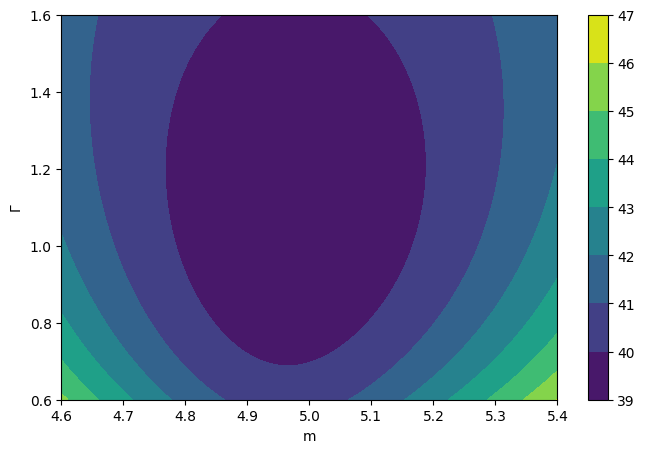

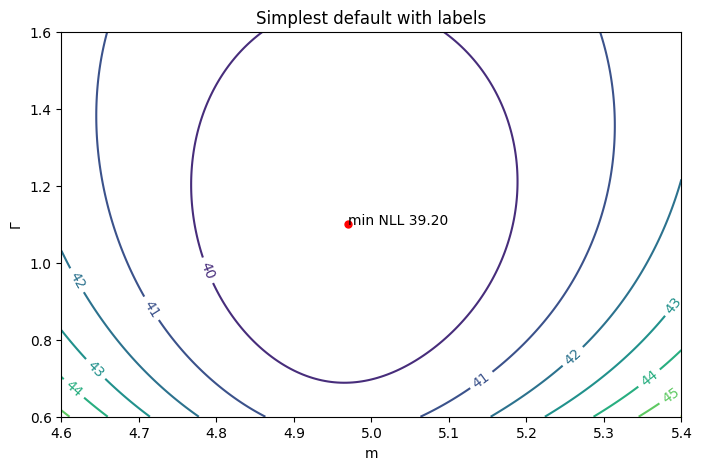

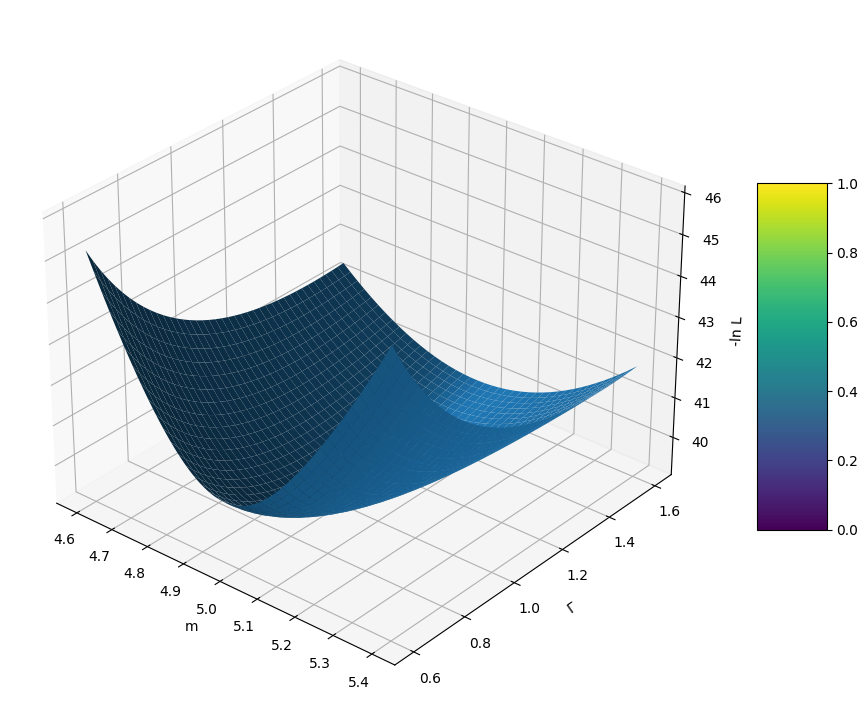

In [22]:
#
# Instead of 1D parameter scan (we fixed width and scan mass), we can do two dimensional scan.
#
# Create 2D contour
#  Scan mass and width parameter
#

logL=[]
m_range=np.linspace(4.6,5.4,201)
gamma_range=np.linspace(0.6,1.6,201)
for m1 in m_range:
    for gamma1 in gamma_range:
#        val=0
#        for i in r:
#            #print(i,m1,gamma1)
#            val+=-1*np.log(pdf(i,m1,gamma1))
        logL.append(logLL(m1,gamma1))
            
m_range, gamma_range = np.meshgrid(m_range, gamma_range)
logL=np.array(logL).reshape(201,201)


# Creating 2D contour

plt.contourf(m_range, gamma_range, logL.T)
plt.colorbar()
plt.xlabel('m')
plt.ylabel('$\Gamma$')

# Creating 2D simple contour 

fig, ax = plt.subplots()
CS = ax.contour(m_range, gamma_range, logL.T)
ax.set_xlabel('m')
ax.set_ylabel('$\Gamma$')
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')
plt.text(mass0,gamma0, 'min NLL {:.2f}'.format(minNLL)) 
plt.plot(mass0,gamma0, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

# Creating 3D figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
surf = ax.plot_surface(m_range, gamma_range,logL.T)
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)

ax.set_xlabel('m')
ax.set_ylabel('$\Gamma$')
ax.set_zlabel('-ln L')
ax.view_init(30, -50)

plt.show()

In [26]:
# Using iminuit package
# This is a very convenient package for multi-dimensional parameter fitting
# Study tutorial to learn more examples
# https://iminuit.readthedocs.io/
#
from iminuit import cost, Minuit

#
# Here is an example of using unbinned negative log-likelihood (NLL) method  
# to find best fit parameter (mass, width)
#
c = cost.UnbinnedNLL(r, pdf)

# starting from initial mass=3 GeV and Width gamma=2 GeV 
m = Minuit(c, m=3, gamma=2)
m.limits["m"] = (0, 10)
m.limits["gamma"] = (0, 5)
m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 78.38                      │              Nfcn = 63               │
│ EDM = 6.64e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m     │   4.97    │   0.16    │            │            │    0    │   10    │       │
│ 1 │ gamma │    1.1    │    0.4    │            │            │    0    │    5    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────┐
│       │      m  gamma │
├───────┼───────────────┤
│     m │ 0.0246 0.0022 │
│ gamma │ 0.0022  0.141 │
└───────┴───────────────┘

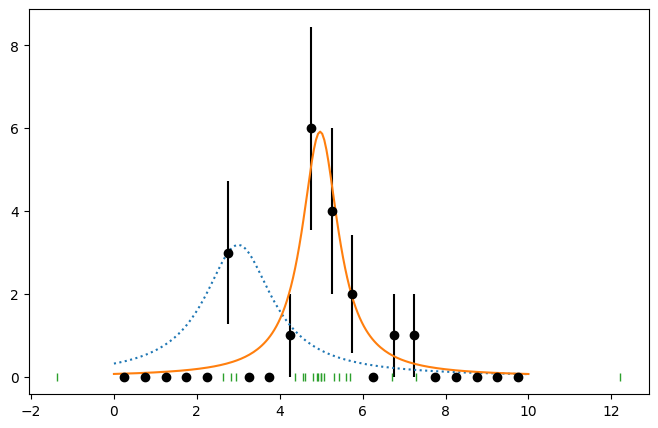

In [27]:
# Draw fitted function
#   We initialize iminuit to start from  mass=3 GeV and Width gamma=2 GeV as initial parameter.
#   The results are converged to mass=4.97 GeV and width=1.1 GeV
#   This is consistent with our customized MLE implementation
#
n, xe = np.histogram(r, bins=x_range)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
#plt.plot(r, np.zeros_like(r), "|", alpha=0.1);
plt.plot(x, pdf(x, *[p.value for p in m.init_params]) * len(r) * dx[0], ls=":", label="init")
plt.plot(x, pdf(x, *m.values) * len(r) * dx[0], label="fit")

plt.plot(r, np.zeros_like(r), "|", alpha=1);